# To Grant or Not to Grant: Deciding on Compensation Benefits 

### Machine Learning Group Project 2024/2025 - Group 52


__Members:__
- Diogo Rodrigues _(20240512@novaims.unl.pt)_
- Alexandre Gonçalves _(20240738@novaims.unl.pt)_
- Pedro Costa _(20222121@novaims.unl.pt)_
- Santiago Taylor _(20240542@novaims.unl.pt)_
- Lena Hermann _(20241446@novaims.unl.pt)_

## Introduction
- __Motivation__: The New York Workers’ Compensation Board (WCB) handles a vast number of workplace injury claims, which require timely and accurate decisions. Currently, manually reviewing these claims is both resource-intensive and time-consuming. An automated model could significantly expedite the decision-making process, improving efficiency and consistency in awarding compensation.
- __Dataset__: The dataset contains claims assembled by the WCB from the beginning of 2020 to the end of 2022, which serves as the training data. The test data comprises claims from January 2023 onward. Each claim includes various attributes such as injury details, claimant information, and associated codes that characterize the nature, cause, and affected body part of the injury. This comprehensive dataset enables the development of predictive models based on historical decisions.
- __Task and Goal__: The primary objective of this project is to develop and evaluate machine learning models that can accurately classify the WCB’s final decision on the type of injury for each claim (i.e., the "Claim Injury Type"). This involves creating a multiclass classification model to predict injury types based on the provided features, optimizing model performance, and assessing the importance of different features. The ultimate goal is to produce a model that can generalize well to unseen data, assisting the WCB in making faster, data-driven decisions on new claims.

| **ATTRIBUTE**                        | **DESCRIPTION**                                                                                                         |
|--------------------------------------|-------------------------------------------------------------------------------------------------------------------------|
| Accident Date                        | Injury date of the claim.                                                                                               |
| Age at Injury                        | Age of injured worker when the injury occurred.                                                                         |
| Alternative Dispute Resolution       | Adjudication processes external to the Board.                                                                           |
| Assembly Date                        | The date the claim was first assembled.                                                                                 |
| Attorney/Representative              | Is the claim being represented by an Attorney?                                                                          |
| Average Weekly Wage                  | The wage used to calculate workers’ compensation, disability, or Paid Leave wage replacement benefits.                  |
| Birth Year                           | The reported year of birth of the injured worker.                                                                       |
| C-2 Date                             | Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2).              |
| C-3 Date                             | Date Form C-3 (Employee Claim Form) was received.                                                                       |
| Carrier Name                         | Name of primary insurance provider responsible for providing workers’ compensation coverage to the injured worker's employer. |
| Carrier Type                         | Type of primary insurance provider responsible for providing workers’ compensation coverage.                            |
| Claim Identifier                     | Unique identifier for each claim, assigned by WCB.                                                                      |
| County of Injury                     | Name of the New York County where the injury occurred.                                                                  |
| COVID-19 Indicator                   | Indication that the claim may be associated with COVID-19.                                                              |
| District Name                        | Name of the WCB district office that oversees claims for that region or area of the state.                              |
| First Hearing Date                   | Date the first hearing was held on a claim at a WCB hearing location. A blank date means the claim has not yet had a hearing held. |
| Gender                               | The reported gender of the injured worker.                                                                              |
| IME-4 Count                          | Number of IME-4 forms received per claim. The IME-4 form is the “Independent Examiner’s Report of Independent Medical Examination” form. |
| Industry Code                        | NAICS code and descriptions are available at https://www.naics.com/search-naics-codes-by-industry/.                     |
| Industry Code Description            | 2-digit NAICS industry code description used to classify businesses according to their economic activity.               |
| Medical Fee Region                   | Approximate region where the injured worker would receive medical service.                                               |
| OIICS Nature of Injury Description   | The OIICS nature of injury codes & descriptions are available at https://www.bls.gov/iif/oiics_manual_2007.pdf.         |
| WCIO Cause of Injury Code            | The WCIO cause of injury codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Cause_Table.pdf.  |
| WCIO Cause of Injury Description     | See description of field above.                                                                                         |
| WCIO Nature of Injury Code           | The WCIO nature of injury are available at https://www.wcio.org/Active%20PNC/WCIO_Nature_Table.pdf.                     |
| WCIO Nature of Injury Description    | See description of field above.                                                                                         |
| WCIO Part Of Body Code               | The WCIO part of body codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Part_Table.pdf.      |
| WCIO Part Of Body Description        | See description of field above.                                                                                         |
| Zip Code                             | The reported ZIP code of the injured worker’s home address.                                                             |
| Agreement Reached                    | Binary variable: Yes if there is an agreement without the involvement of the WCB -> unknown at the start of a claim.    |
| WCB Decision                         | Multiclass variable: Decision of the WCB relative to the claim: “Accident” means that claim refers to workplace accident, “Occupational Disease” means illness from the workplace. -> requires WCB deliberation so it is unknown at start of claim. |
| Claim Injury Type                    | Main target variable: Deliberation of the WCB relative to benefits awarded to the claim. Numbering indicates severity.   |


## Table of Content
<a id='top'></a>
[1. Set-Up and Data Loading](#dataload) <br>
&nbsp;&nbsp;&nbsp;[1.1 Import the Needed Libraries](#import_libaries) <br>
&nbsp;&nbsp;&nbsp;[1.2 Read the Data and First Overview](#read_data) <br>

## 1. Set-Up and Data Loading <a id='dataload'></a>
[to the top](#top)

### 1.1 Import the Needed Libraries <a id='import_libaries'></a>

In [16]:
import os
import numpy as np #to efficiently compute functions
import pandas as pd #to work with data frames
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import zipfile #to open zipfile
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 60)
from scipy.stats import mode

# data partition
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# embedded methods
from sklearn.linear_model import LassoCV

#Imputing missing values
from sklearn.impute import SimpleImputer

# encoding and scaling
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler

# model selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# models
from sklearn.ensemble import RandomForestClassifier

# model assessment
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### 1.2 Read the Data and First Overview <a id='read_data'></a>
[to the top](#top)

In [17]:
train_zip_path = 'train_data.csv.zip'
test_zip_path = 'test_data.csv.zip'

# open csv file from zip
def read_zipped_csv(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as z:
        csv_filename = z.namelist()[0]
        
        with z.open(csv_filename) as f:
            return pd.read_csv(f)

train_df = read_zipped_csv(train_zip_path)
test_df = read_zipped_csv(test_zip_path)

In [18]:
train_df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [19]:
test_df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
0,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,6165911,BRONX,N,NYC,NaN,M,NaN,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
1,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,1A. PRIVATE,6166141,QUEENS,N,NYC,NaN,F,NaN,45.0,RETAIL TRADE,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1
2,2022-12-26,59,N,2023-01-02,N,0.0,1963.0,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,1A. PRIVATE,6165907,WESTCHESTER,N,NYC,NaN,F,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,III,NaN,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604,0
3,2022-12-28,55,N,2023-01-02,N,0.0,0.0,2023-01-02,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,6166047,QUEENS,N,NYC,NaN,F,NaN,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,53.0,KNEE,11411,6
4,2022-12-20,25,N,2023-01-02,N,0.0,1997.0,2022-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,6166102,KINGS,N,NYC,NaN,M,NaN,55.0,MANAGEMENT OF COMPANIES AND ENTERPRISES,IV,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,11212,5


# 2. Data Understanding, Consistency and Feature Engineering <a id='dataunderstand'></a>
[to the top](#top)

## 2.1. Perform the Hold Out Method w/ 2 splits to avoid data leakage

In [20]:
y = train_df['Claim Injury Type'].dropna()

In [21]:
# Define X by dropping the target column and aligning it with y's indices
X = train_df.drop(columns='Claim Injury Type')
X = X.loc[y.index]  # Align X with the indices of y

In [22]:
print(f"Percentage of data removed after cleaning the target variable: {(len(y) / len(train_df['Claim Injury Type'])) * 100:.2f}%")

Percentage of data removed after cleaning the target variable: 96.72%


In [23]:
# Re-do the split to avoid Leakage

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=15, 
    stratify=y
)


In [24]:
# Step 2: Perform Validation + Test split
X_train, X_val, y_train, y_val = train_test_split(X_train_val, 
                                                  y_train_val, 
                                                  test_size = 0.2, 
                                                  random_state = 15, 
                                                  stratify = y_train_val)

In [25]:
X_train.shape, X_val.shape, X_test.shape

((367376, 32), (91844, 32), (114806, 32))

## 2.2. Check Missing Values and Duplicates

In [26]:
X_train.isnull().sum()

Accident Date                           2365
Age at Injury                              0
Alternative Dispute Resolution             0
Assembly Date                              0
Attorney/Representative                    0
Average Weekly Wage                    18304
Birth Year                             18571
C-2 Date                                9283
C-3 Date                              247721
Carrier Name                               0
Carrier Type                               0
Claim Identifier                           0
County of Injury                           0
COVID-19 Indicator                         0
District Name                              0
First Hearing Date                    270721
Gender                                     0
IME-4 Count                           282316
Industry Code                           6373
Industry Code Description               6373
Medical Fee Region                         0
OIICS Nature of Injury Description    367376
WCIO Cause

In [27]:
X_val.isnull().sum()

Accident Date                           581
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                    4684
Birth Year                             4717
C-2 Date                               2269
C-3 Date                              61733
Carrier Name                              0
Carrier Type                              0
Claim Identifier                          0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                    67776
Gender                                    0
IME-4 Count                           70619
Industry Code                          1557
Industry Code Description              1557
Medical Fee Region                        0
OIICS Nature of Injury Description    91844
WCIO Cause of Injury Code       

In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387975 entries, 0 to 387974
Data columns (total 30 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       385531 non-null  object 
 1   Age at Injury                       387975 non-null  int64  
 2   Alternative Dispute Resolution      387975 non-null  object 
 3   Assembly Date                       387975 non-null  object 
 4   Attorney/Representative             387975 non-null  object 
 5   Average Weekly Wage                 368771 non-null  float64
 6   Birth Year                          368505 non-null  float64
 7   C-2 Date                            378841 non-null  object 
 8   C-3 Date                            85216 non-null   object 
 9   Carrier Name                        387975 non-null  object 
 10  Carrier Type                        387975 non-null  object 
 11  Claim Identifier          

## 2.2.1 Check the % of missing values

In [29]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [30]:
missing_values_table(X_train)

Your selected dataframe has 32 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values
OIICS Nature of Injury Description,367376,100.0
IME-4 Count,282316,76.8
First Hearing Date,270721,73.7
C-3 Date,247721,67.4
Birth Year,18571,5.1
Average Weekly Wage,18304,5.0
Zip Code,18291,5.0
WCIO Part Of Body Description,10903,3.0
WCIO Part Of Body Code,10903,3.0
WCIO Nature of Injury Description,10011,2.7


In [31]:
missing_values_table(X_val)

Your selected dataframe has 32 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values
OIICS Nature of Injury Description,91844,100.0
IME-4 Count,70619,76.9
First Hearing Date,67776,73.8
C-3 Date,61733,67.2
Birth Year,4717,5.1
Average Weekly Wage,4684,5.1
Zip Code,4606,5.0
WCIO Part Of Body Description,2684,2.9
WCIO Part Of Body Code,2684,2.9
WCIO Nature of Injury Description,2424,2.6


## 2.2.2 Drop features with high % of missing values (See if we should drop these variables for the final report)

* OIICS Nature of Injury Description: has 100% missing values and as such it can be removed from our feature space.

* IME-4 Count : Given that IME-4 Count has 77,62% of missing values and its variance is low compared to the median variance of numerical features (8 < 439) and its spearman correlation with the target is almost 0 probably it's better if we drop this variable.

* C-3 Date: has a high correlation with other variables and 67.4% missing data, making it less informative compared to the others. 

* First Hearing Date Numeric while it has the lowest correlation with the other date variables, the 73.7% missing data makes it difficult to justify its retention.

In [32]:
X_train.drop(columns=['OIICS Nature of Injury Description', 'IME-4 Count', 'C-3 Date' , 'First Hearing Date'], inplace=True)
X_val.drop(columns=['OIICS Nature of Injury Description', 'IME-4 Count', 'C-3 Date' , 'First Hearing Date'], inplace=True)
X_test.drop(columns=['OIICS Nature of Injury Description', 'IME-4 Count', 'C-3 Date' , 'First Hearing Date'], inplace=True)
test_df.drop(columns=['OIICS Nature of Injury Description', 'IME-4 Count', 'C-3 Date' , 'First Hearing Date'], inplace=True)

## 2.2.3 Drop features with 1 value only / Features that are not present in Test Set / Highly Imbalanced Features

In [33]:
# WCB Decision has only 1 value , so this feature has no predictive power to our model and thus should be dropped

X_train['WCB Decision'].value_counts()

WCB Decision
Not Work Related    367376
Name: count, dtype: int64

In [34]:
# Drop the column across all datasets
X_train = X_train.drop(columns=['WCB Decision'])
X_val = X_val.drop(columns=['WCB Decision'])
X_test = X_test.drop(columns=['WCB Decision'])

In [35]:
# 'WCB Decision' : this variable is not present in test_df and thus we don't need to drop it

In [36]:
# Agreement Reached is not present in X_train and X_val and thus we should drop it from test_df

## 2.2.4 Check in EDA Notebook the correlation (ANOVA or Chi-Square Test between Alt.Dispute Resolution and target)

In [37]:
X_train['Alternative Dispute Resolution'].value_counts()    

Alternative Dispute Resolution
N    365682
Y      1690
U         4
Name: count, dtype: int64

In [38]:
# Drop the column across all datasets
X_train = X_train.drop(columns=['Alternative Dispute Resolution'])
X_val = X_val.drop(columns=['Alternative Dispute Resolution'])
X_test = X_test.drop(columns=['Alternative Dispute Resolution'])

In [39]:
test_df = test_df.drop(columns=['Alternative Dispute Resolution'])   


In [40]:
X_train['Agreement Reached'].value_counts()

Agreement Reached
0.0    350281
1.0     17095
Name: count, dtype: int64

As the variable Agreement Reached is not available in test_df, it is likely because this information
depends on post-outcome data or is not collected or known at prediction time.
Therefore, training and validating the model with this variable would create a dependency that cannot be met in production. As a result, we will drop this feature from our X_train and X_val datasets.

In [41]:
# Drop the column across all datasets
X_train = X_train.drop(columns=['Agreement Reached'])
X_val = X_val.drop(columns=['Agreement Reached'])
X_test = X_test.drop(columns=['Agreement Reached'])

## 2.2.5 Duplicates

In [42]:
# checking for duplicates
X_train.duplicated().sum()

np.int64(0)

In [43]:
X_val.duplicated().sum()

np.int64(0)

In [44]:
test_df.duplicated().sum()

np.int64(0)

## 2.3. Data Coherence Checking

## 2.3.1 Codes Analysis

In [45]:
def analyze_code_description_relationship(data, code_column, description_column):
    # Step 1: Count unique descriptions per code
    code_to_description = data.groupby(code_column)[description_column].nunique()
    # Check if each code maps to a single unique description
    if code_to_description.max() == 1:
        print(f"\nEach {code_column} has only one unique {description_column}.")
    else:
        print(f"\nSome {code_column}s have multiple {description_column}s associated with them.")

    # Step 2: Count unique codes per description
    description_to_code = data.groupby(description_column)[code_column].nunique()
    # Check if each description maps to a single unique code
    if description_to_code.max() == 1:
        print(f"\nEach {description_column} has only one unique {code_column}.")
    else:
        print(f"\nSome {description_column}s have multiple {code_column}s associated with them.")

    # Step 3: Validate if there is a 1:1 relationship
    is_one_to_one = (code_to_description.max() == 1) and (description_to_code.max() == 1)
    if is_one_to_one:
        print(f"\n{code_column} and {description_column} have a 1:1 relationship.")
    else:
        print(f"\nThere is no 1:1 relationship between {code_column} and {description_column}.")

    # Step 4: Find descriptions with multiple unique associated codes
    description_to_unique_codes = data.groupby(description_column)[code_column].apply(lambda x: list(set(x)))
    descriptions_with_multiple_unique_codes = description_to_unique_codes[description_to_unique_codes.apply(len) > 1]
    
    print(f"\nDescriptions with multiple unique associated {code_column}s:")
    print(descriptions_with_multiple_unique_codes)

__Industry Code / Industry Code Description__

In [46]:
analyze_code_description_relationship(train_df, 'Industry Code', 'Industry Code Description')


Each Industry Code has only one unique Industry Code Description.

Some Industry Code Descriptions have multiple Industry Codes associated with them.

There is no 1:1 relationship between Industry Code and Industry Code Description.

Descriptions with multiple unique associated Industry Codes:
Industry Code Description
MANUFACTURING                     [32.0, 33.0, 31.0]
RETAIL TRADE                            [44.0, 45.0]
TRANSPORTATION AND WAREHOUSING          [48.0, 49.0]
Name: Industry Code, dtype: object


Since each __Industry Code__ uniquely maps to one __Industry Code Description__, we can delete the Industry Code and only keep its corresponding description. We will keep the description variable because we have more information within it that we will use for binning / mapping later. Since we have almost the same information in both variables, we don't need to keep both since it would distort the data for the models.

__WCIO Cause of Injury Code / WCIO Cause of Injury Description__

In [47]:
analyze_code_description_relationship(train_df, 'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description')


Each WCIO Cause of Injury Code has only one unique WCIO Cause of Injury Description.

Some WCIO Cause of Injury Descriptions have multiple WCIO Cause of Injury Codes associated with them.

There is no 1:1 relationship between WCIO Cause of Injury Code and WCIO Cause of Injury Description.

Descriptions with multiple unique associated WCIO Cause of Injury Codes:
WCIO Cause of Injury Description
OBJECT BEING LIFTED OR HANDLED    [17.0, 66.0, 79.0]
REPETITIVE MOTION                       [97.0, 94.0]
Name: WCIO Cause of Injury Code, dtype: object


For __WCIO Cause of Injury Code / Description__ it is the same as for __Industry Code / Description__. It shows that each code corresponds to only one unique description. This indicates that every code maps to a single description. However, some __WCIO Cause of Injury Descriptions__ map to more than one WCIO Cause of Injury Code. We will also just keep the __WCIO Cause of Injury Description.__

__WCIO Nature of Injury Code / WCIO Nature of Injury Description__

In [48]:
analyze_code_description_relationship(train_df, 'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description')


Each WCIO Nature of Injury Code has only one unique WCIO Nature of Injury Description.

Each WCIO Nature of Injury Description has only one unique WCIO Nature of Injury Code.

WCIO Nature of Injury Code and WCIO Nature of Injury Description have a 1:1 relationship.

Descriptions with multiple unique associated WCIO Nature of Injury Codes:
Series([], Name: WCIO Nature of Injury Code, dtype: object)


Since the Code and the Description have a 1:1 relationship, we will delete __WCIO Nature of Injury Code__. We decided to keep the description insted of the code to later map into groups. This can be done better with the descriptions than the code because we have more information in the descriptions.

__WCIO Part Of Body Code / WCIO Part Of Body Description__

In [49]:
analyze_code_description_relationship(train_df, 'WCIO Part Of Body Code', 'WCIO Part Of Body Description')


Each WCIO Part Of Body Code has only one unique WCIO Part Of Body Description.

Some WCIO Part Of Body Descriptions have multiple WCIO Part Of Body Codes associated with them.

There is no 1:1 relationship between WCIO Part Of Body Code and WCIO Part Of Body Description.

Descriptions with multiple unique associated WCIO Part Of Body Codes:
WCIO Part Of Body Description
DISC           [43.0, 22.0]
SOFT TISSUE    [25.0, 18.0]
SPINAL CORD    [47.0, 23.0]
Name: WCIO Part Of Body Code, dtype: object


For __WCIO Part Of Body Code / Description__ it is the same as for __Industry Code / Description__ and __WCIO Cause of Injury Code / Description__. It shows that each code corresponds to only one unique description. We will also just keep the __WCIO Part Of Body Description__ for further mapping reasons.

## 2.3.2 Dropping the previous feature codes from our feature space


In [50]:
codes_to_drop = columns_to_drop = [
    'Industry Code', 
    'WCIO Cause of Injury Code', 
    'WCIO Nature of Injury Code', 
    'WCIO Part Of Body Code'
]

In [51]:
# Drop columns from the filtered datasets
X_train = X_train.drop(columns=columns_to_drop)
X_val = X_val.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)
test_df = test_df.drop(columns=columns_to_drop)

## 2.3.3 Mapping for WCIO features

__WCIO Cause of Injury Description__

In [52]:
# Mapping dictionary
injury_mapping = {
    # Falls and Slips
    'FALL, SLIP OR TRIP, NOC': 'Falls and Slips',
    'FROM LIQUID OR GREASE SPILLS': 'Falls and Slips',
    'ON ICE OR SNOW': 'Falls and Slips',
    'ON SAME LEVEL': 'Falls and Slips',
    'ON STAIRS': 'Falls and Slips',
    'SLIP, OR TRIP, DID NOT FALL': 'Falls and Slips',
    
    # Lifting and Strain
    'OBJECT BEING LIFTED OR HANDLED': 'Lifting and Strain',
    'LIFTING': 'Lifting and Strain',
    'TWISTING': 'Lifting and Strain',
    'PUSHING OR PULLING': 'Lifting and Strain',
    'STRAIN OR INJURY BY, NOC': 'Lifting and Strain',
    'REACHING': 'Lifting and Strain',
    'HOLDING OR CARRYING': 'Lifting and Strain',
    
    # Collisions and Motor Vehicle Accidents
    'COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE': 'Collisions and Motor Vehicle Accidents',
    'MOTOR VEHICLE, NOC': 'Collisions and Motor Vehicle Accidents',
    'MOTOR VEHICLE': 'Collisions and Motor Vehicle Accidents',
    'COLLISION WITH A FIXED OBJECT': 'Collisions and Motor Vehicle Accidents',
    'CRASH OF RAIL VEHICLE': 'Collisions and Motor Vehicle Accidents',
    'CRASH OF WATER VEHICLE': 'Collisions and Motor Vehicle Accidents',
    'CRASH OF AIRPLANE': 'Collisions and Motor Vehicle Accidents',
    'VEHICLE UPSET': 'Collisions and Motor Vehicle Accidents',
    
    # Struck By Object or Person
    'STRUCK OR INJURED, NOC': 'Struck By Object or Person',
    'FALLING OR FLYING OBJECT': 'Struck By Object or Person',
    'STEPPING ON SHARP OBJECT': 'Struck By Object or Person',
    'FELLOW WORKER, PATIENT OR OTHER PERSON': 'Struck By Object or Person',
    'ANIMAL OR INSECT': 'Struck By Object or Person',
    'WIELDING OR THROWING': 'Struck By Object or Person',
    
    # Exposure to Substances and Environment
    'CHEMICALS': 'Exposure to Substances and Environment',
    'DUST, GASES, FUMES OR VAPORS': 'Exposure to Substances and Environment',
    'ABSORPTION, INGESTION OR INHALATION, NOC': 'Exposure to Substances and Environment',
    'STEAM OR HOT FLUIDS': 'Exposure to Substances and Environment',
    'COLD OBJECTS OR SUBSTANCES': 'Exposure to Substances and Environment',
    'TEMPERATURE EXTREMES': 'Exposure to Substances and Environment',
    'CONTINUAL NOISE': 'Exposure to Substances and Environment',
    'MOLD': 'Exposure to Substances and Environment',
    'ABNORMAL AIR PRESSURE': 'Exposure to Substances and Environment',
    'RADIATION': 'Exposure to Substances and Environment',
    
    # Tools, Machinery, and Objects
    'HAND TOOL, UTENSIL; NOT POWERED': 'Tools, Machinery, and Objects',
    'POWERED HAND TOOL, APPLIANCE': 'Tools, Machinery, and Objects',
    'USING TOOL OR MACHINERY': 'Tools, Machinery, and Objects',
    'MOVING PARTS OF MACHINE': 'Tools, Machinery, and Objects',
    'MACHINE OR MACHINERY': 'Tools, Machinery, and Objects',
    'MOVING PART OF MACHINE': 'Tools, Machinery, and Objects',
    'OBJECT HANDLED BY OTHERS': 'Tools, Machinery, and Objects',
    'BROKEN GLASS': 'Tools, Machinery, and Objects',
    
    # Explosions and Fire
    'FIRE OR FLAME': 'Explosions and Fire',
    'EXPLOSION OR FLARE BACK': 'Explosions and Fire',
    
    # Natural Disasters and Uncommon Events
    'NATURAL DISASTERS': 'Natural Disasters and Uncommon Events',
    'TERRORISM': 'Natural Disasters and Uncommon Events',
    'PANDEMIC': 'Natural Disasters and Uncommon Events',
}

In [53]:
# Apply mapping to X_train
X_train['Cause Injury Category'] = X_train['WCIO Cause of Injury Description'].map(injury_mapping).fillna('Other')

# Apply mapping to X_val
X_val['Cause Injury Category'] = X_val['WCIO Cause of Injury Description'].map(injury_mapping).fillna('Other')

X_test['Cause Injury Category'] = X_test['WCIO Cause of Injury Description'].map(injury_mapping).fillna('Other')

# Apply mapping to test_df
test_df['Cause Injury Category'] = test_df['WCIO Cause of Injury Description'].map(injury_mapping).fillna('Other')


__WCIO Nature of Injury Description__

In [54]:
# Mapping dictionary
injury_nature_mapping = {
    # Physical Trauma
    'CONTUSION': 'Physical Trauma',
    'SPRAIN OR TEAR': 'Physical Trauma',
    'CONCUSSION': 'Physical Trauma',
    'PUNCTURE': 'Physical Trauma',
    'LACERATION': 'Physical Trauma',
    'FRACTURE': 'Physical Trauma',
    'CRUSHING': 'Physical Trauma',
    'DISLOCATION': 'Physical Trauma',
    'AMPUTATION': 'Physical Trauma',
    'SEVERANCE': 'Physical Trauma',
    
    # Cumulative or Repetitive Injuries
    'CARPAL TUNNEL SYNDROME': 'Cumulative or Repetitive Injuries',
    'INFLAMMATION': 'Cumulative or Repetitive Injuries',
    'ALL OTHER CUMULATIVE INJURY, NOC': 'Cumulative or Repetitive Injuries',
    'ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC': 'Cumulative or Repetitive Injuries',
    'ALL OTHER SPECIFIC INJURIES, NOC': 'Cumulative or Repetitive Injuries',
    
    # Burns and Temperature-Related Injuries
    'BURN': 'Burns and Temperature-Related Injuries',
    'HEAT PROSTRATION': 'Burns and Temperature-Related Injuries',
    'FREEZING': 'Burns and Temperature-Related Injuries',
    
    # Respiratory Issues
    'RESPIRATORY DISORDERS': 'Respiratory Issues',
    'ASBESTOSIS': 'Respiratory Issues',
    'DUST DISEASE, NOC': 'Respiratory Issues',
    'BLACK LUNG': 'Respiratory Issues',
    'SILICOSIS': 'Respiratory Issues',
    'BYSSINOSIS': 'Respiratory Issues',
    
    # Poisoning and Chemical Exposure
    'POISONING - GENERAL (NOT OD OR CUMULATIVE': 'Poisoning and Chemical Exposure',
    'POISONING - CHEMICAL, (OTHER THAN METALS)': 'Poisoning and Chemical Exposure',
    'POISONING - METAL': 'Poisoning and Chemical Exposure',
    
    # Infections and Diseases
    'INFECTION': 'Infections and Diseases',
    'COVID-19': 'Infections and Diseases',
    'CONTAGIOUS DISEASE': 'Infections and Diseases',
    'AIDS': 'Infections and Diseases',
    'HEPATITIS C': 'Infections and Diseases',
    'CANCER': 'Infections and Diseases',
    
    # Psychological and Mental Health
    'MENTAL STRESS': 'Psychological and Mental Health',
    'MENTAL DISORDER': 'Psychological and Mental Health',
    'NO PHYSICAL INJURY': 'Psychological and Mental Health',
    'MULTIPLE INJURIES INCLUDING BOTH PHYSICAL AND PSYCHOLOGICAL': 'Psychological and Mental Health',
    
    # Circulatory and Heart-Related Issues
    'MYOCARDIAL INFARCTION': 'Circulatory and Heart-Related Issues',
    'ANGINA PECTORIS': 'Circulatory and Heart-Related Issues',
    'VASCULAR': 'Circulatory and Heart-Related Issues',
    
    # Sensory Loss
    'LOSS OF HEARING': 'Sensory Loss',
    'HEARING LOSS OR IMPAIRMENT': 'Sensory Loss',
    'VISION LOSS': 'Sensory Loss',
    'ENUCLEATION': 'Sensory Loss',
    
    # Radiation and Light Exposure
    'RADIATION': 'Radiation and Light Exposure',
    'VDT - RELATED DISEASES': 'Radiation and Light Exposure',
    
    # Miscellaneous (catch-all for remaining cases)
    'ASPHYXIATION': 'Miscellaneous Conditions',
    'SYNCOPE': 'Miscellaneous Conditions',
    'DERMATITIS': 'Miscellaneous Conditions',
    'ADVERSE REACTION TO A VACCINATION OR INOCULATION': 'Miscellaneous Conditions'
}

In [55]:
# Apply mapping to X_train
X_train['Nature of Injury Category'] = X_train['WCIO Nature of Injury Description'].map(injury_nature_mapping).fillna('Other')

# Apply mapping to X_val
X_val['Nature of Injury Category'] = X_val['WCIO Nature of Injury Description'].map(injury_nature_mapping).fillna('Other')

X_test['Nature of Injury Category'] = X_test['WCIO Cause of Injury Description'].map(injury_nature_mapping).fillna('Other')

# Apply mapping to test_df
test_df['Nature of Injury Category'] = test_df['WCIO Nature of Injury Description'].map(injury_nature_mapping).fillna('Other')

__WCIO Part of Body Description__

In [56]:
# Mapping dictionary
body_part_mapping = {
    # Head and Face
    'SKULL': 'Head and Face', 'FACIAL BONES': 'Head and Face', 'EYE(S)': 'Head and Face',
    'MOUTH': 'Head and Face', 'NOSE': 'Head and Face', 'EAR(S)': 'Head and Face', 
    'BRAIN': 'Head and Face', 'TEETH': 'Head and Face',

    # Neck and Throat
    'MULTIPLE NECK INJURY': 'Neck and Throat', 'LARYNX': 'Neck and Throat', 'TRACHEA': 'Neck and Throat',

    # Upper and Lower Back
    'UPPER BACK AREA': 'Upper Back',
    'LOWER BACK AREA': 'Lower Back', 'LUMBAR & OR SACRAL VERTEBRAE (VERTEBRA': 'Lower Back',
    'SACRUM AND COCCYX': 'Lower Back',

    # Spinal Column
    'SPINAL CORD': 'Spinal Column', 'VERTEBRAE': 'Spinal Column',

    # Shoulder
    'SHOULDER(S)': 'Shoulder', 

    # Arm and Wrist
    'LOWER ARM': 'Arm and Wrist', 'UPPER ARM': 'Arm and Wrist', 'WRIST': 'Arm and Wrist',

    # Hand and Fingers
    'HAND': 'Hand and Fingers', 'FINGER(S)': 'Hand and Fingers', 'THUMB': 'Hand and Fingers',

    # Hip
    'HIP': 'Hip', 

    # Leg
    'LOWER LEG': 'Leg', 'UPPER LEG': 'Leg',

    # Knee
    'KNEE': 'Knee',

    # Ankle and Foot
    'ANKLE': 'Ankle and Foot', 'FOOT': 'Ankle and Foot', 'TOES': 'Ankle and Foot', 'GREAT TOE': 'Ankle and Foot',

    # Chest
    'CHEST': 'Chest',

    # Abdomen and Pelvis
    'ABDOMEN INCLUDING GROIN': 'Abdomen and Pelvis', 'PELVIS': 'Abdomen and Pelvis', 'BUTTOCKS': 'Abdomen and Pelvis',

    # Lungs
    'LUNGS': 'Lungs',

    # Heart
    'HEART': 'Heart',

    # Internal Organs
    'INTERNAL ORGANS': 'Internal Organs',

    # Body Systems
    'BODY SYSTEMS AND MULTIPLE BODY SYSTEMS': 'Body Systems', 
    'WHOLE BODY': 'Body Systems', 'MULTIPLE BODY PARTS (INCLUDING BODY': 'Body Systems',
    'ARTIFICIAL APPLIANCE': 'Body Systems',

    # Soft Tissue
    'SOFT TISSUE': 'Soft Tissue',

    # Unclassified or Insufficient Info
    'NO PHYSICAL INJURY': 'Unclassified or Insufficient Info',
    'INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLASSIFIED': 'Unclassified or Insufficient Info'
}

In [57]:
# Apply mapping to X_train
X_train['Body Part Category'] = X_train['WCIO Part Of Body Description'].map(body_part_mapping).fillna('Other')

# Apply mapping to X_val
X_val['Body Part Category'] = X_val['WCIO Part Of Body Description'].map(body_part_mapping).fillna('Other')

X_test['Body Part Category'] = X_test['WCIO Part Of Body Description'].map(body_part_mapping).fillna('Other')


# Apply mapping to X_test
test_df['Body Part Category'] = test_df['WCIO Part Of Body Description'].map(body_part_mapping).fillna('Other')

## 2.3.4 Mapping for Gender

In [58]:
# Replace 'U' and 'X' with 'Other' in the Gender column for all datasets
for dataset, name in zip([X_train, X_val, X_test, test_df], ['X_train', 'X_val', 'X_test', 'test_df']):
    dataset['Gender'] = dataset['Gender'].replace({'U': 'Other', 'X': 'Other'})
    # Verify the change by printing value counts
    print(f"\n{name} - Gender Distribution:")
    print(dataset['Gender'].value_counts())


X_train - Gender Distribution:
Gender
M        214771
F        149526
Other      3079
Name: count, dtype: int64

X_val - Gender Distribution:
Gender
M        53490
F        37590
Other      764
Name: count, dtype: int64

X_test - Gender Distribution:
Gender
M        66957
F        46935
Other      914
Name: count, dtype: int64

test_df - Gender Distribution:
Gender
M        215343
F        167019
Other      5613
Name: count, dtype: int64


## 2.4. Feature Engineering

## 2.4.1 Binning Age - Age Category

In [59]:
# As we are creating Age Category from Age at Injury which is the relevant variable , we can drop the 'Date of Birth' column from all datasets

X_train.drop(columns=['Birth Year'], inplace=True)
X_val.drop(columns=['Birth Year'], inplace=True)
X_test.drop(columns=['Birth Year'], inplace=True)

test_df.drop(columns=['Birth Year'], inplace=True)

In [60]:
# Define age bins and labels
age_bins = [0, 19, 29, 39, 49, 59, float('inf')]
age_labels = ['Under 20', '20-29', '30-39', '40-49', '50-59', '60 and above']

# Apply age group binning to all datasets
for dataset, name in zip([X_train, X_val, X_test, test_df], ['X_train', 'X_val', 'X_test', 'test_df']):
    # Create the age groups
    dataset['Age_Group'] = pd.cut(dataset['Age at Injury'], bins=age_bins, labels=age_labels)

    # Print distribution for verification
    print(f"\n{name} - Age_Group Distribution:")
    print(dataset['Age_Group'].value_counts())



X_train - Age_Group Distribution:
Age_Group
30-39           84155
50-59           82582
40-49           74778
20-29           70560
60 and above    44313
Under 20         7476
Name: count, dtype: int64

X_val - Age_Group Distribution:
Age_Group
30-39           21213
50-59           20636
40-49           18769
20-29           17631
60 and above    10890
Under 20         1839
Name: count, dtype: int64

X_test - Age_Group Distribution:
Age_Group
30-39           26344
50-59           25965
40-49           23411
20-29           21696
60 and above    13963
Under 20         2341
Name: count, dtype: int64

test_df - Age_Group Distribution:
Age_Group
30-39           91558
20-29           83431
50-59           77711
40-49           76344
60 and above    47424
Under 20         8259
Name: count, dtype: int64


## 2.4.2 Binning Wage - Wage Category

In [61]:
# Define wage bins and labels
wage_bins = [-np.inf, 1, 700, 1100, 1500, float('inf')]
wage_labels = ['Zero', 'Below Average', 'Average', 'Above Average', 'High']

# Apply wage group binning to all datasets
for dataset, name in zip([X_train, X_val, X_test, test_df], ['X_train', 'X_val', 'X_test', 'test_df']):    # Create the wage groups
    dataset['Wage_Group'] = pd.cut(dataset['Average Weekly Wage'], bins=wage_bins, labels=wage_labels)

    # Print distribution for verification
    print(f"\n{name} - Wage_Group Distribution:")
    print(dataset['Wage_Group'].value_counts())


X_train - Wage_Group Distribution:
Wage_Group
Zero             214763
High              37467
Average           36066
Below Average     33588
Above Average     27188
Name: count, dtype: int64

X_val - Wage_Group Distribution:
Wage_Group
Zero             53622
High              9330
Average           9142
Below Average     8312
Above Average     6754
Name: count, dtype: int64

X_test - Wage_Group Distribution:
Wage_Group
Zero             67065
High             11882
Average          11219
Below Average    10553
Above Average     8424
Name: count, dtype: int64

test_df - Wage_Group Distribution:
Wage_Group
Zero             316549
Average           15087
High              14428
Below Average     12565
Above Average     10142
Name: count, dtype: int64


## 2.4.3 Grouping Carrier Name 

In [62]:
# Step 1 - Count carrier occurrences in X_train
carrier_counts = X_train['Carrier Name'].value_counts()
carrier_counts

Carrier Name
STATE INSURANCE FUND              71061
POLICE, FIRE, SANITATION          13937
AMERICAN ZURICH INSURANCE CO      11251
CHARTER OAK FIRE INS CO           11081
INDEMNITY INS. OF N AMERICA        9151
                                  ...  
AIG PROPERTY CASUALTY CO.             1
ENTERGY NUCLEAR OPERATIONS, IN        1
CHERRY VALLEY SPRINGFIELD             1
NYS WCB (LIABLE CARRIER IS 06)        1
WEST BEND MUTUAL INSURANCE            1
Name: count, Length: 1951, dtype: int64

In [63]:
# Step 2 -Define the threshold
threshold = 5000

# Step 3 - Group carriers in X_train based on the threshold
X_train['Carrier Name Grouped'] = X_train['Carrier Name'].apply(
    lambda x: x if carrier_counts.get(x, 0) > threshold else 'Other'
)

In [64]:
# Step 4: Apply the same grouping logic to X_val and test_df
def group_carrier_name(carrier_name):
    # Use the mapping logic derived from X_train
    return carrier_name if carrier_counts.get(carrier_name, 0) > threshold else 'Other'

# Step 5 - Apply the function to X_val and test_df
X_val['Carrier Name Grouped'] = X_val['Carrier Name'].apply(group_carrier_name)
X_test['Carrier Name Grouped'] = X_test['Carrier Name'].apply(group_carrier_name)
test_df['Carrier Name Grouped'] = test_df['Carrier Name'].apply(group_carrier_name)

## 2.4.4 Convert Date Formats into Numerical Features / Create new Date Features

Since we can't use the date variables for the models, we want to extract all the information they contain. Some variables might be exaclty the same "Accident_Year" and "Assembly_Year". However, we will calaculate all of them and exclude irrelevant ones in the feature selection part.

- __Lag_Time__: Difference in days between accident date and assembly date
- __Accident_to_C2_Lag__: Difference in days between accident date and C-2 date
- __Accident_Year__: Extract the year from Accident Date
- __Accident_Month__: Extract the month from Accident Date
- __Accident_Month_Sin__: Sine of the month from Accident Date; this transformation is used to represent the cyclic nature of months (ensures that December (month 12) is closer to January (month 1) in feature space)
- __Accident_Month_Cos__: Cosine of the month from Accident Date; this transformation is used to represent the cyclic nature of months (ensures that December (month 12) is closer to January (month 1) in feature space)
- __Accident_Day__: Extract the day from Accident Date
- __Reference_Days_Accident__: Starting with the first accident day and counting onwards to get a numerical order of the dates
- __Assembly_Year__: Extract the year from Assembly Date
- __Assembly_Month__: Extract the month from Assembly Date
- __Assembly_Month_Sin__: Sine of the month from Assembly Date; this transformation is used to represent the cyclic nature of months (ensures that December (month 12) is closer to January (month 1) in feature space)
- __Assembly_Month_Cos__: Cosine of the month from Assembly Date; this transformation is used to represent the cyclic nature of months (ensures that December (month 12) is closer to January (month 1) in feature space)
- __Assembly_Day__: Extract the day from Assembly Date
- __Reference_Days_Assembly__: Starting with the first assembly day and counting onwards to get a numerical order of the dates
- __C-2_Year__: Extract the year from C-2 Date
- __C-2_Month__: Extract the month from C-2 Date
- __C-2_Month_Sin__: Sine of the month from C-2 Date; this transformation is used to represent the cyclic nature of months (ensures that December (month 12) is closer to January (month 1) in feature space)
- __C-2_Month_Cos__: Cosine of the month from C-2 Date; this transformation is used to represent the cyclic nature of months (ensures that December (month 12) is closer to January (month 1) in feature space)
- __C-2_Day__: Extract the day from C-2 Date
- __Reference_Days_C-2__: Starting with the first C-2 day and counting onwards to get a numerical order of the dates

In [65]:
# Convert date columns to datetime format
date_cols = ['Accident Date', 'Assembly Date', 'C-2 Date']
for col in date_cols:
    X_train[col] = pd.to_datetime(X_train[col], errors='coerce')
    X_val[col] = pd.to_datetime(X_val[col], errors='coerce')
    X_test[col] = pd.to_datetime(X_test[col], errors='coerce')
    test_df[col] = pd.to_datetime(test_df[col], errors='coerce')

# Get the minimum Accident Date from X_train
min_accident_date = X_train['Accident Date'].min()

# Create new features for X_train
X_train['Lag_Time'] = (X_train['Assembly Date'] - min_accident_date).dt.days
X_train['Accident_to_C2_Lag'] = (X_train['C-2 Date'] - min_accident_date).dt.days

# Create new features for X_val using the same minimum date from X_train
X_val['Lag_Time'] = (X_val['Assembly Date'] - min_accident_date).dt.days
X_val['Accident_to_C2_Lag'] = (X_val['C-2 Date'] - min_accident_date).dt.days


# Create new features for X_test using the same minimum date from X_train
X_test['Lag_Time'] = (X_test['Assembly Date'] - min_accident_date).dt.days
X_test['Accident_to_C2_Lag'] = (X_test['C-2 Date'] - min_accident_date).dt.days


# Create new features for test_df using the same minimum date from X_train
test_df['Lag_Time'] = (test_df['Assembly Date'] - min_accident_date).dt.days
test_df['Accident_to_C2_Lag'] = (test_df['C-2 Date'] - min_accident_date).dt.days



In [66]:
# Extract specific components of each date for X_train, X_val, and test_df
for col in date_cols:
    # X_train transformations
    X_train[f'{col}_Year'] = X_train[col].dt.year
    X_train[f'{col}_Month'] = X_train[col].dt.month
    X_train[f'{col}_Day'] = X_train[col].dt.dayofweek
    
    # X_val transformations
    X_val[f'{col}_Year'] = X_val[col].dt.year
    X_val[f'{col}_Month'] = X_val[col].dt.month
    X_val[f'{col}_Day'] = X_val[col].dt.dayofweek

      # X_test transformations
    X_test[f'{col}_Year'] = X_test[col].dt.year
    X_test[f'{col}_Month'] = X_test[col].dt.month
    X_test[f'{col}_Day'] = X_test[col].dt.dayofweek
    
    # test_df transformations
    test_df[f'{col}_Year'] = test_df[col].dt.year
    test_df[f'{col}_Month'] = test_df[col].dt.month
    test_df[f'{col}_Day'] = test_df[col].dt.dayofweek

In [67]:
# Accident Date transformations
for dataset in [X_train, X_val, X_test, test_df]:
    dataset['Accident_Year'] = dataset['Accident Date_Year']
    dataset['Accident_Month'] = dataset['Accident Date_Month']
    dataset['Accident_Month_Sin'] = np.sin(2 * np.pi * dataset['Accident_Month'] / 12)
    dataset['Accident_Month_Cos'] = np.cos(2 * np.pi * dataset['Accident_Month'] / 12)
    dataset['Accident_Day'] = dataset['Accident Date_Day']

# Assembly Date transformations
for dataset in [X_train, X_val,X_test, test_df]:
    dataset['Assembly_Year'] = dataset['Assembly Date_Year']
    dataset['Assembly_Month'] = dataset['Assembly Date_Month']
    dataset['Assembly_Month_Sin'] = np.sin(2 * np.pi * dataset['Assembly_Month'] / 12)
    dataset['Assembly_Month_Cos'] = np.cos(2 * np.pi * dataset['Assembly_Month'] / 12)
    dataset['Assembly_Day'] = dataset['Assembly Date_Day']

# C-2 Date transformations
for dataset in [X_train, X_val, X_test, test_df]:
    dataset['C-2_Year'] = dataset['C-2 Date_Year']
    dataset['C-2_Month'] = dataset['C-2 Date_Month']
    dataset['C-2_Month_Sin'] = np.sin(2 * np.pi * dataset['C-2_Month'] / 12)
    dataset['C-2_Month_Cos'] = np.cos(2 * np.pi * dataset['C-2_Month'] / 12)
    dataset['C-2_Day'] = dataset['C-2 Date_Day']


In [68]:
# Drop the original date columns
X_train.drop(columns=date_cols, inplace=True)
X_val.drop(columns=date_cols, inplace=True)
X_test.drop(columns=date_cols, inplace=True)


In [69]:
test_df.drop(columns=date_cols, inplace=True)

In [70]:
# All the datasets until now have the same number of columns so the preprocessing (until now) is done correctly
X_train.shape, X_val.shape, X_test.shape, test_df.shape

((367376, 49), (91844, 49), (114806, 49), (387975, 49))

## 2.4.5 - Checking Outliers for New Features Created

In [71]:
# Check for years outside the valid range
year_outliers = X_train[(X_train['Accident_Year'] < 2000) | 
                                 (X_train['Accident_Year'] > 2022) |
                                 (X_train['Assembly_Year'] < 2020) |
                                 (X_train['Assembly_Year'] > 2022) |
                                 (X_train['C-2_Year'] > 2023)]

# Print the length of the year outliers
print(f"Number of Accident Year outliers in X_train_filtered: {len(year_outliers)}")

# Check for months outside the valid range (1 to 12)
month_outliers = X_train[(X_train['Accident_Month'] < 1) | 
                                  (X_train['Accident_Month'] > 12) |
                                  (X_train['Assembly_Month'] < 1) |
                                  (X_train['Assembly_Month'] > 12) |
                                  (X_train['C-2_Month'] < 1) |
                                  (X_train['C-2_Month'] > 12)]


# Print the length of the month outliers
print(f"Number of Month outliers in X_train_filtered: {len(month_outliers)}")


# Check for days outside the valid range (0 to 6 for days of the week)
day_outliers = X_train[(X_train['Accident_Day'] < 0) | 
                                (X_train['Accident_Day'] > 6) |
                                (X_train['Assembly_Day'] < 0) |
                                (X_train['Assembly_Day'] > 6) |
                                (X_train['C-2_Day'] < 0) |
                                (X_train['C-2_Day'] > 6)]


# Print the length of the day outliers
print(f"Number of Day outliers in X_train_filtered: {len(day_outliers)}")

Number of Accident Year outliers in X_train_filtered: 736
Number of Month outliers in X_train_filtered: 0
Number of Day outliers in X_train_filtered: 0


## 2.4.6 - Treating Outliers for the New Features Created (Only on X_Train)

Filtering logic:

* For Accident Date:

Keep only records with an Accident Year between 2000 and 2022.

* For Assembly Date:

Keep only records with an Assembly Year between 2020 and 2022.

* For C-2 Date:

Keep only records with a C-2 Year less than or equal to 2023 (since there's no lower bound specified).

In [72]:
# Check for years outside the valid range and drop the rows
X_train_filtered = X_train[
    ~((X_train['Accident_Year'] < 2000) | 
      (X_train['Accident_Year'] > 2022) |
      (X_train['Assembly_Year'] < 2020) |
      (X_train['Assembly_Year'] > 2022) |
      (X_train['C-2_Year'] > 2023))
]

# Check for months outside the valid range (1 to 12) and drop the rows
X_train_filtered = X_train_filtered[
    ~((X_train_filtered['Accident_Month'] < 1) | 
       (X_train_filtered['Accident_Month'] > 12) |
       (X_train_filtered['Assembly_Month'] < 1) |
       (X_train_filtered['Assembly_Month'] > 12) |
       (X_train_filtered['C-2_Month'] < 1) |
       (X_train_filtered['C-2_Month'] > 12))
]

# Check for days outside the valid range (0 to 6 for days of the week) and drop the rows
X_train_filtered = X_train_filtered[
    ~((X_train_filtered['Accident_Day'] < 0) | 
       (X_train_filtered['Accident_Day'] > 6) |
       (X_train_filtered['Assembly_Day'] < 0) |
       (X_train_filtered['Assembly_Day'] > 6) |
       (X_train_filtered['C-2_Day'] < 0) |
       (X_train_filtered['C-2_Day'] > 6))
]

In [73]:
print(f"{(1 - len(X_train_filtered) / X_train.shape[0])*100} % of the data was removed due to outlier date filtering.")

0.2003397064587742 % of the data was removed due to outlier date filtering.


# 2.5. Missing Values Handling (Imputation in X_train and then apply it to X_val and X_test)

In [74]:
X_train.isnull().sum()

Age at Injury                            0
Attorney/Representative                  0
Average Weekly Wage                  18304
Carrier Name                             0
Carrier Type                             0
Claim Identifier                         0
County of Injury                         0
COVID-19 Indicator                       0
District Name                            0
Gender                                   0
Industry Code Description             6373
Medical Fee Region                       0
WCIO Cause of Injury Description     10000
WCIO Nature of Injury Description    10011
WCIO Part Of Body Description        10903
Zip Code                             18291
Number of Dependents                     0
Cause Injury Category                    0
Nature of Injury Category                0
Body Part Category                       0
Age_Group                             3512
Wage_Group                           18304
Carrier Name Grouped                     0
Lag_Time   

# 2.5.1 Handling NaNs for numerical features training set

In [75]:
numerical_cols = X_train_filtered.select_dtypes(include=np.number).columns.tolist()
numerical_cols

['Age at Injury',
 'Average Weekly Wage',
 'Claim Identifier',
 'Number of Dependents',
 'Lag_Time',
 'Accident_to_C2_Lag',
 'Accident Date_Year',
 'Accident Date_Month',
 'Accident Date_Day',
 'Assembly Date_Year',
 'Assembly Date_Month',
 'Assembly Date_Day',
 'C-2 Date_Year',
 'C-2 Date_Month',
 'C-2 Date_Day',
 'Accident_Year',
 'Accident_Month',
 'Accident_Month_Sin',
 'Accident_Month_Cos',
 'Accident_Day',
 'Assembly_Year',
 'Assembly_Month',
 'Assembly_Month_Sin',
 'Assembly_Month_Cos',
 'Assembly_Day',
 'C-2_Year',
 'C-2_Month',
 'C-2_Month_Sin',
 'C-2_Month_Cos',
 'C-2_Day']

In [76]:
# Create the imputer for median imputation
numerical_imputer = SimpleImputer(strategy='median')

In [77]:
# Apply the imputer to X_train and fit it
X_train_filtered[numerical_cols] = numerical_imputer.fit_transform(X_train_filtered[numerical_cols])

In [78]:
# Apply the same transformation to X_val and X_test
X_val[numerical_cols] = numerical_imputer.transform(X_val[numerical_cols])
X_test[numerical_cols] = numerical_imputer.transform(X_test[numerical_cols])

# 2.5.2 Handling NaNs for numerical features test set

In [79]:
# numerical_imputer.transform(test_df[numerical_cols]): This will use the imputer that was fitted on X_train to transform test_df. 
# It will replace any missing values in the numerical_cols of test_df with the median values that were calculated from X_train.

test_df[numerical_cols] = numerical_imputer.transform(test_df[numerical_cols])

# 2.5.3 Handling NaNs for categorical features training set

In [80]:
categorical_cols = X_train_filtered.select_dtypes(include='object').columns.tolist()
categorical_cols = categorical_cols  + ['Age_Group', 'Wage_Group']
categorical_cols

['Attorney/Representative',
 'Carrier Name',
 'Carrier Type',
 'County of Injury',
 'COVID-19 Indicator',
 'District Name',
 'Gender',
 'Industry Code Description',
 'Medical Fee Region',
 'WCIO Cause of Injury Description',
 'WCIO Nature of Injury Description',
 'WCIO Part Of Body Description',
 'Zip Code',
 'Cause Injury Category',
 'Nature of Injury Category',
 'Body Part Category',
 'Carrier Name Grouped',
 'Age_Group',
 'Wage_Group']

In [81]:
X_train[categorical_cols].isnull().sum()    

Attorney/Representative                  0
Carrier Name                             0
Carrier Type                             0
County of Injury                         0
COVID-19 Indicator                       0
District Name                            0
Gender                                   0
Industry Code Description             6373
Medical Fee Region                       0
WCIO Cause of Injury Description     10000
WCIO Nature of Injury Description    10011
WCIO Part Of Body Description        10903
Zip Code                             18291
Cause Injury Category                    0
Nature of Injury Category                0
Body Part Category                       0
Carrier Name Grouped                     0
Age_Group                             3512
Wage_Group                           18304
dtype: int64

In [82]:
# Create the imputer for mode imputation
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [83]:
# Apply the imputer to X_train, X_val, and X_test (and test_df if needed)
X_train_filtered[categorical_cols] = categorical_imputer.fit_transform(X_train_filtered[categorical_cols])

In [84]:
X_val[categorical_cols] = categorical_imputer.transform(X_val[categorical_cols])
X_test[categorical_cols] = categorical_imputer.transform(X_test[categorical_cols])

# 2.5.4 Handling NaNs for categorical features test set

In [85]:
test_df[categorical_cols] = categorical_imputer.transform(test_df[categorical_cols])

In [86]:
X_train_filtered.isnull().sum()

Age at Injury                        0
Attorney/Representative              0
Average Weekly Wage                  0
Carrier Name                         0
Carrier Type                         0
Claim Identifier                     0
County of Injury                     0
COVID-19 Indicator                   0
District Name                        0
Gender                               0
Industry Code Description            0
Medical Fee Region                   0
WCIO Cause of Injury Description     0
WCIO Nature of Injury Description    0
WCIO Part Of Body Description        0
Zip Code                             0
Number of Dependents                 0
Cause Injury Category                0
Nature of Injury Category            0
Body Part Category                   0
Age_Group                            0
Wage_Group                           0
Carrier Name Grouped                 0
Lag_Time                             0
Accident_to_C2_Lag                   0
Accident Date_Year       

In [87]:
X_val.isnull().sum()

Age at Injury                        0
Attorney/Representative              0
Average Weekly Wage                  0
Carrier Name                         0
Carrier Type                         0
Claim Identifier                     0
County of Injury                     0
COVID-19 Indicator                   0
District Name                        0
Gender                               0
Industry Code Description            0
Medical Fee Region                   0
WCIO Cause of Injury Description     0
WCIO Nature of Injury Description    0
WCIO Part Of Body Description        0
Zip Code                             0
Number of Dependents                 0
Cause Injury Category                0
Nature of Injury Category            0
Body Part Category                   0
Age_Group                            0
Wage_Group                           0
Carrier Name Grouped                 0
Lag_Time                             0
Accident_to_C2_Lag                   0
Accident Date_Year       

In [88]:
X_test.isnull().sum()

Age at Injury                        0
Attorney/Representative              0
Average Weekly Wage                  0
Carrier Name                         0
Carrier Type                         0
Claim Identifier                     0
County of Injury                     0
COVID-19 Indicator                   0
District Name                        0
Gender                               0
Industry Code Description            0
Medical Fee Region                   0
WCIO Cause of Injury Description     0
WCIO Nature of Injury Description    0
WCIO Part Of Body Description        0
Zip Code                             0
Number of Dependents                 0
Cause Injury Category                0
Nature of Injury Category            0
Body Part Category                   0
Age_Group                            0
Wage_Group                           0
Carrier Name Grouped                 0
Lag_Time                             0
Accident_to_C2_Lag                   0
Accident Date_Year       

In [89]:
test_df.isnull().sum()

Age at Injury                        0
Attorney/Representative              0
Average Weekly Wage                  0
Carrier Name                         0
Carrier Type                         0
Claim Identifier                     0
County of Injury                     0
COVID-19 Indicator                   0
District Name                        0
Gender                               0
Industry Code Description            0
Medical Fee Region                   0
WCIO Cause of Injury Description     0
WCIO Nature of Injury Description    0
WCIO Part Of Body Description        0
Zip Code                             0
Number of Dependents                 0
Cause Injury Category                0
Nature of Injury Category            0
Body Part Category                   0
Age_Group                            0
Wage_Group                           0
Carrier Name Grouped                 0
Lag_Time                             0
Accident_to_C2_Lag                   0
Accident Date_Year       

In [90]:
X_train.shape, X_val.shape, X_test.shape, test_df.shape

((367376, 49), (91844, 49), (114806, 49), (387975, 49))

# 2.6 Outliers Handling - Include in the EDA Notebook

In [91]:
outliers_features =  [
    'Age at Injury', 'Average Weekly Wage', 'Claim Identifier', 'Number of Dependents', 
    'Lag_Time', 'Accident_to_C2_Lag', 'Accident Date_Year', 'Accident Date_Month', 
    'Accident Date_Day', 'Assembly Date_Year', 'Assembly Date_Month', 'Assembly Date_Day', 
    'C-2 Date_Year', 'C-2 Date_Month', 'C-2 Date_Day', 'Accident_Year', 
    'Accident_Month', 'Accident_Month_Sin', 'Accident_Month_Cos', 'Accident_Day', 
    'Assembly_Year', 'Assembly_Month', 'Assembly_Month_Sin', 'Assembly_Month_Cos', 
    'Assembly_Day', 'C-2_Year', 'C-2_Month', 'C-2_Month_Sin', 'C-2_Month_Cos', 'C-2_Day'
]

In [ ]:
# Determine grid size for subplots
n_features = len(outliers_features)
rows = (n_features // 5) + (1 if n_features % 5 != 0 else 0)  # Adjust columns as needed
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows), tight_layout=True)

for i, feature in enumerate(outliers_features):
    row, col = divmod(i, cols)
    ax = axes[row, col] if rows > 1 else axes[col]
    X_train.boxplot(column=feature, ax=ax)
    ax.set_title(feature)
    ax.set_xticks([])  # Remove x-ticks for cleaner visualization

# Remove empty subplots
if n_features % cols != 0:
    for j in range(n_features, rows * cols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

We have some redudant (duplicated) variables in our dataset that resulted from the transformations. 

Variables to drop:

* Accident_Year

* C2_Year

* Accident_Month

* Assembly_Month 

* C-2_Month

* Accident Date_Day 

* Assembly Date_Year  


In [ ]:
redundant_features = ['Accident_Year', 'C-2_Year', 'Accident_Month', 
                      'Assembly_Month', 'C-2_Month', 'Accident Date_Day', 
                      'Assembly Date_Year']


In [ ]:
X_train_filtered = X_train_filtered.drop(columns=redundant_features)
X_val = X_val.drop(columns=redundant_features)
X_test = X_test.drop(columns=redundant_features)

test_df = test_df.drop(columns=redundant_features)

In [ ]:
X_train_filtered.shape, X_val.shape, X_test.shape, test_df.shape

((401021, 42), (86104, 42), (86104, 42), (387975, 42))

## Plot again the BoxPlots and see which variables have outliers and thus should be treated

In [ ]:
numerical_cols_filtered = X_train_filtered.select_dtypes(include=np.number).columns.tolist()

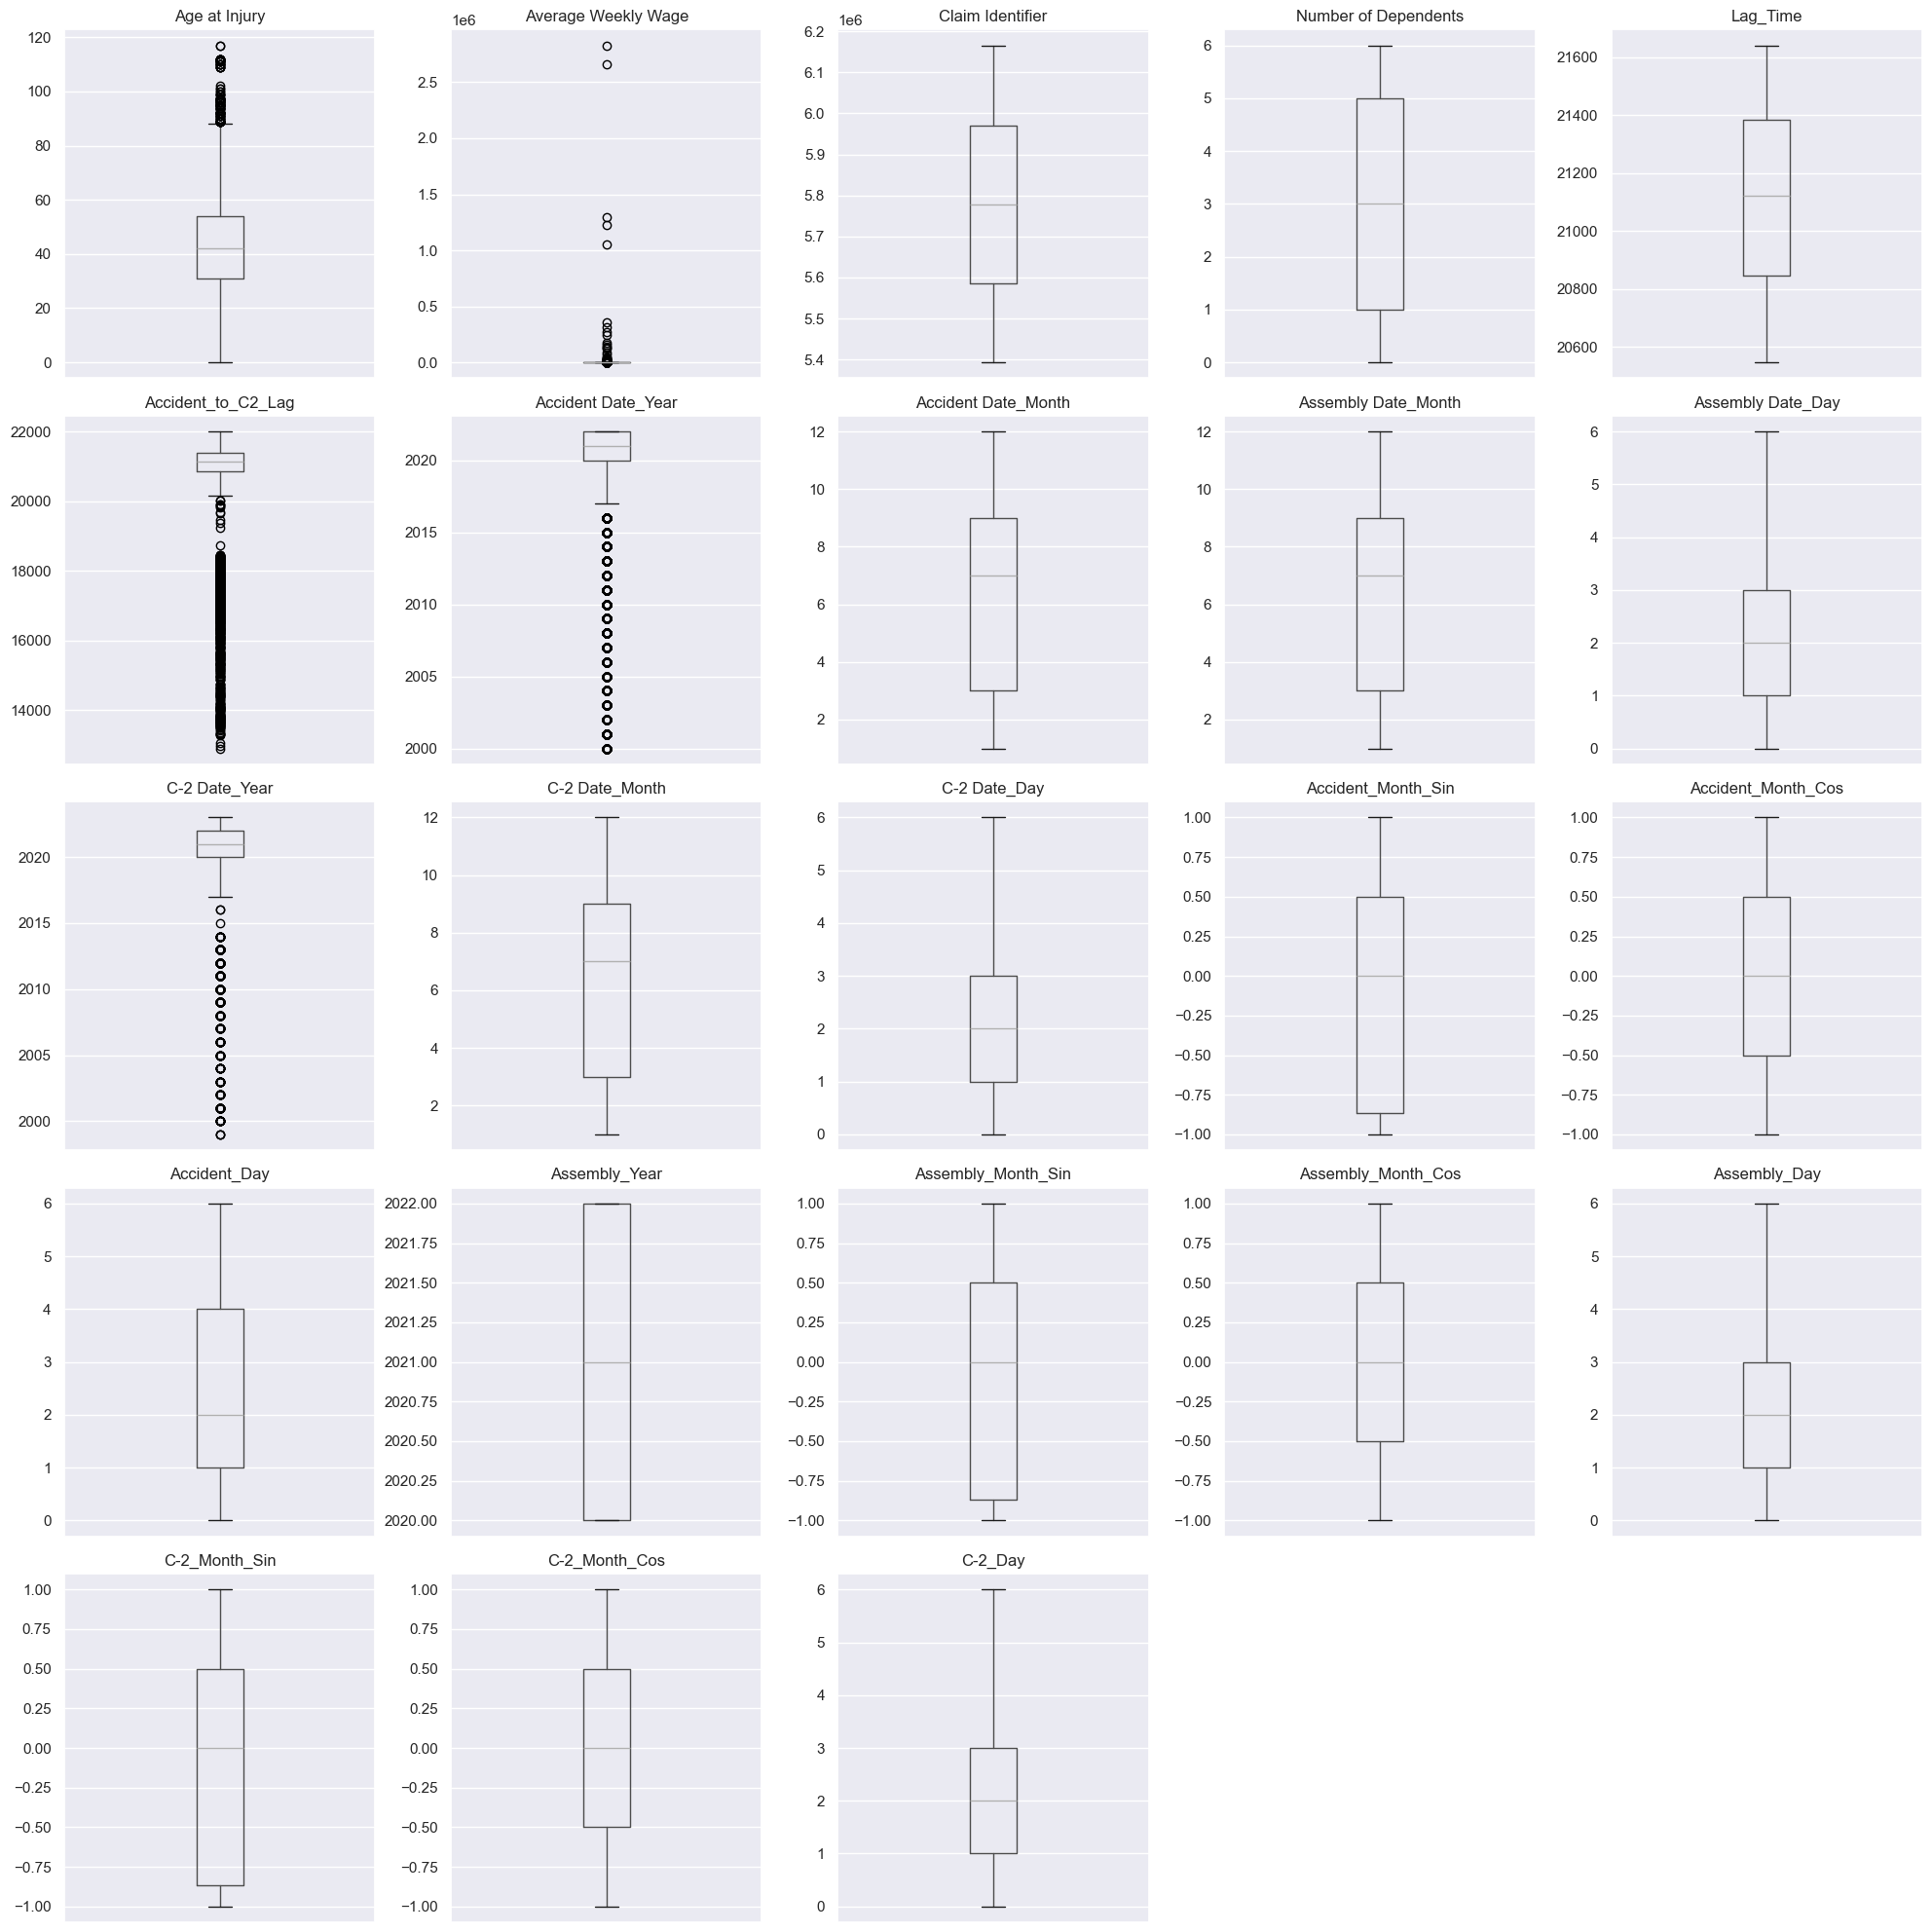

In [ ]:
# Determine grid size for subplots
n_features = len(numerical_cols_filtered)
rows = (n_features // 5) + (1 if n_features % 5 != 0 else 0)  # Adjust rows dynamically
cols = 5  # Fixed number of columns

fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows), tight_layout=True)

for i, feature in enumerate(numerical_cols_filtered):
    row, col = divmod(i, cols)
    ax = axes[row, col] if rows > 1 else axes[col]
    X_train_filtered.boxplot(column=feature, ax=ax)
    ax.set_title(feature)
    ax.set_xticks([])  # Remove x-ticks for cleaner visualization

# Remove empty subplots if there are leftover grid spaces
if n_features % cols != 0:
    for j in range(n_features, rows * cols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

### Variables that have outliers:

* Age at Injury 
* Average Weekly Wage
* Accident_to_C2_Lag
* Accident Date_Year

## 2.6.1 - Age at Injury

In [ ]:
# Total number of rows in the DataFrame
total_rows = len(X_train_filtered)

# Count rows with 'Age at Injury' below 14
below_14_count = X_train_filtered[X_train_filtered['Age at Injury'] < 14].shape[0]
below_14_percentage = (below_14_count / total_rows) * 100

# Count rows with 'Age at Injury' over 90
over_90_count = X_train_filtered[X_train_filtered['Age at Injury'] > 90].shape[0]
over_90_percentage = (over_90_count / total_rows) * 100

# Print the results
print(f"Number of rows with 'Age at Injury' below 14: {below_14_count} ({below_14_percentage:.2f}%)")
print(f"Number of rows with 'Age at Injury' over 90: {over_90_count} ({over_90_percentage:.2f}%)")

Number of rows with 'Age at Injury' below 14: 3769 (0.94%)
Number of rows with 'Age at Injury' over 90: 126 (0.03%)


In [ ]:
X_train_filtered = X_train_filtered[(X_train_filtered['Age at Injury'] >= 14) & (X_train_filtered['Age at Injury'] <= 90)]

In [ ]:
# Reset the index after dropping rows
X_train_filtered.reset_index(drop=True, inplace=True)

## 2.6.2 - Average Weekly Wage / Accident_to_C2_Lag , Accident Date_Year

In [ ]:
# Creating a copy of X_train_filtered to simulate the X_outliers DataFrame for processing
X_outliers = X_train_filtered.copy()

# Features to analyze for outlier removal
features = ['Average Weekly Wage', 'Accident_to_C2_Lag', 'Accident Date_Year']

# Initial count of rows in X_train_filtered
initial_count = len(X_train_filtered)

# Removing outliers using the IQR method
for feature in features:
    Q1 = X_outliers[feature].quantile(0.25)
    Q3 = X_outliers[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X_outliers = X_outliers[(X_outliers[feature] >= lower_bound) & (X_outliers[feature] <= upper_bound)]

# Count after outlier removal
final_count = len(X_outliers)

# Percentage of data removed
percentage_removed = ((initial_count - final_count) / initial_count) * 100
percentage_removed


5.19885376429647

In [ ]:
print(f"{len(X_outliers) / len(X_train) * 100}% of the data was removed due to outlier removal.")

93.69416004260636% of the data was removed due to outlier removal.


In [ ]:
X_outliers.shape , X_val.shape, X_test.shape, test_df.shape

((376480, 42), (86104, 42), (86104, 42), (387975, 42))

# 2.7. Saving the pre-processing

In [ ]:
# Define the absolute path for saving files
processed_dir = "C:/Users/alexg/Ambiente de Trabalho/Mestrado Data Science NOVA IMS/1st semester/Machine Learning/Project_github/ML_Project_Group52/project/data/processed"

In [ ]:
# Ensure the directory exists
os.makedirs(processed_dir, exist_ok=True)

train_file_path = os.path.join(processed_dir, 'prepared_claims_data_train.csv')
val_file_path = os.path.join(processed_dir, 'prepared_claims_data_val.csv')
test_file_path = os.path.join(processed_dir, 'prepared_claims_data_test.csv')

X_train.to_csv(train_file_path, index=False)
X_val.to_csv(val_file_path, index=False)
X_test.to_csv(test_file_path, index=False)

print(f"Training data saved to: {train_file_path}")
print(f"Validation data saved to: {val_file_path}")
print(f"Test data saved to: {test_file_path}")

Training data saved to: C:/Users/alexg/Ambiente de Trabalho/Mestrado Data Science NOVA IMS/1st semester/Machine Learning/Project_github/ML_Project_Group52/project/data/processed\prepared_claims_data_train.csv
Validation data saved to: C:/Users/alexg/Ambiente de Trabalho/Mestrado Data Science NOVA IMS/1st semester/Machine Learning/Project_github/ML_Project_Group52/project/data/processed\prepared_claims_data_val.csv
Test data saved to: C:/Users/alexg/Ambiente de Trabalho/Mestrado Data Science NOVA IMS/1st semester/Machine Learning/Project_github/ML_Project_Group52/project/data/processed\prepared_claims_data_test.csv
